# Exploratory Data Analysis

#### What is the problem we are trying to solve?  
Develop a medical question-answering system utilizing the provided dataset containing medical  information.  
The goal is to create a model that can effectively answer user queries related to  medical diseases. You are free to augment the provided dataset with other medical datasets if  you feel it is necessary.

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import string

## Let's load our dataset  

In [76]:
abs_path = os.path.abspath('../../')
path_to_data = 'data/raw/'
filename = 'intern_screening_dataset.csv'

In [77]:
# load our dataset
raw_dataset = pd.read_csv(os.path.join(abs_path, path_to_data, filename))

In [78]:
# how does the 10 first samples look like?
raw_dataset.head(10)

,question,answer
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...
1,What is (are) Glaucoma ?,The optic nerve is a bundle of more than 1 mil...
2,What is (are) Glaucoma ?,Open-angle glaucoma is the most common form of...
3,Who is at risk for Glaucoma? ?,Anyone can develop glaucoma. Some people are a...
4,How to prevent Glaucoma ?,"At this time, we do not know how to prevent gl..."
5,What are the symptoms of Glaucoma ?,"At first, open-angle glaucoma has no symptoms...."
6,What are the treatments for Glaucoma ?,"Yes. Immediate treatment for early stage, open..."
7,what research (or clinical trials) is being do...,Through studies in the laboratory and with pat...
8,Who is at risk for Glaucoma? ?,Encourage them to have a comprehensive dilated...
9,What is (are) Glaucoma ?,National Eye Institute National Institutes of...


In [79]:
# check # of samples in the dataset
print(f"There are {raw_dataset.shape[0]:,.0f} samples in this dataset.")

There are 16,406 samples in this dataset.


In [81]:
# check general description of the dataset
# there are some null values
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16406 entries, 0 to 16405
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  16406 non-null  object
 1   answer    16401 non-null  object
dtypes: object(2)
memory usage: 256.5+ KB


In [82]:
# are there any duplicate examples?
print(f"There are {raw_dataset.shape[0]-raw_dataset.drop_duplicates().shape[0]:,.0f} duplicate samples")

There are 48 duplicate samples


In [83]:
# let's drop the duplicate ones, they could mislead some metrics
raw_dataset = raw_dataset.drop_duplicates()
print("Number of samples after removing duplicate ones:")
print(f"{raw_dataset.shape[0]:,.0f}")

Number of samples after removing duplicate ones:
16,358


In [84]:
# let's check for null values in the dataset
print(f"# of null values for questions {raw_dataset.isnull()['question'].value_counts()}")
print()
print(f"# of null values for answers {raw_dataset.isnull()['answer'].value_counts()}")
print()
# There are 5 null values for answer. So let's remove them

# of null values for questions question
False    16358
Name: count, dtype: int64

# of null values for answers answer
False    16353
True         5
Name: count, dtype: int64



In [85]:
# remove samples that have null values for the answer column
raw_dataset = raw_dataset.dropna(subset=['answer'])
raw_dataset.shape

(16353, 2)

In [113]:
# reformat the question by replacing _? by ? without space
raw_dataset['question'] = raw_dataset['question'].map(lambda x: x.replace(' ?', '?'))

In [117]:
# are there cases where the question is the same as the answer? We don't want those examples
raw_dataset[raw_dataset['question'].map(lambda x: ''.join([c for c in x if x not in string.punctuation])).values == raw_dataset['answer'].map(lambda x: ''.join([c for c in x if x not in string.punctuation])).values]

,question,answer,num_words_in_answer
2555,What are the symptoms of Bell's palsy?,What are the symptoms of Bell's palsy?,7
2556,What causes Bell's palsy?,What causes Bell's palsy?,4
3124,Is Wolff-Parkinson-White syndrome inherited?,Is Wolff-Parkinson-White syndrome inherited?,4
3135,Is Williams syndrome inherited?,Is Williams syndrome inherited?,4


In [119]:
# Let's remove those
raw_dataset = raw_dataset.drop(index=[2555,2556,3124,3135])

In [156]:
# remove leading lines and extra white space from the answer
# remove punctuation, just to check whether there are duplicated questions or answers
raw_dataset['processed_question'] = raw_dataset['question'].map(lambda x: ' '.join(x.split()).lower())
raw_dataset['processed_answer'] = raw_dataset['answer'].map(lambda x: ' '.join(x.split()).lower())
raw_dataset['processed_question'] = raw_dataset['processed_question'].map(lambda x: ''.join([c for c in x if c not in string.punctuation]))
raw_dataset['processed_answer'] = raw_dataset['processed_answer'].map(lambda x: ''.join([c for c in x if c not in string.punctuation]))


In [123]:
raw_dataset.shape

(16349, 3)

In [125]:
# are there duplicated questions? or answers?
print(f"There are {raw_dataset.shape[0]-np.unique(raw_dataset['question']).shape[0]} duplicated questions")
print(f"There are {raw_dataset.shape[0]-np.unique(raw_dataset['answer']).shape[0]} duplicated answers")

There are 1375 duplicated questions
There are 542 duplicated answers


In [148]:
print(raw_dataset[raw_dataset.duplicated(subset=['answer'])].head(20)['question'].values[0])
print(raw_dataset[raw_dataset.duplicated(subset=['answer'])].head(20)['answer'].values[0])

what research (or clinical trials) is being done for Uterine Sarcoma?
New types of treatment are being tested in clinical trials.
                    Information about clinical trials is available from the NCI website.
                
                
                    Patients may want to think about taking part in a clinical trial.
                    For some patients, taking part in a clinical trial may be the best treatment choice. Clinical trials are part of the cancer research process. Clinical trials are done to find out if new cancer treatments are safe and effective or better than the standard treatment.   Many of today's standard treatments for cancer are based on earlier clinical trials. Patients who take part in a clinical trial may receive the standard treatment or be among the first to receive a new treatment.   Patients who take part in clinical trials also help improve the way cancer will be treated in the future. Even when clinical trials do not lead to effective n

In [137]:
' '.join(raw_dataset[raw_dataset.duplicated(subset=['answer'])].head(20)['answer'].values[0].split())

"New types of treatment are being tested in clinical trials. Information about clinical trials is available from the NCI website. Patients may want to think about taking part in a clinical trial. For some patients, taking part in a clinical trial may be the best treatment choice. Clinical trials are part of the cancer research process. Clinical trials are done to find out if new cancer treatments are safe and effective or better than the standard treatment. Many of today's standard treatments for cancer are based on earlier clinical trials. Patients who take part in a clinical trial may receive the standard treatment or be among the first to receive a new treatment. Patients who take part in clinical trials also help improve the way cancer will be treated in the future. Even when clinical trials do not lead to effective new treatments, they often answer important questions and help move research forward. Patients can enter clinical trials before, during, or after starting their cancer 

Let's pick up random examples so we can understand the structure of the questions and answers in the dataset


In [86]:
# frac set to a number to approximate 50 samples
random_samples = raw_dataset.sample(frac=0.003, random_state=42)
print(f"# of random samples: {random_samples.shape[0]}")

# of random samples: 49


In [194]:
# Display questions and answers
for index, question, answer in random_samples.itertuples():
    print(index)
    print(question)
    print(answer)
    print()

387
What are the symptoms of Breast Cancer ?
When breast cancer first develops, there may be no symptoms at all. But as the cancer grows, it can cause changes that women should watch for. You can help safeguard your health by learning the following warning signs of breast cancer. -  a lump or thickening in or near the breast or in the underarm area  - a change in the size or shape of the breast  - a dimple or puckering in the skin of the breast  -  a nipple turned inward into the breast  -  fluid, other than breast milk, from the nipple, especially if it's bloody  - scaly, red, or swollen skin on the breast, nipple, or areola (the dark area of skin around the nipple)  - dimples in the breast that look like the skin of an orange. a lump or thickening in or near the breast or in the underarm area a change in the size or shape of the breast a dimple or puckering in the skin of the breast a nipple turned inward into the breast fluid, other than breast milk, from the nipple, especially if i

### Some findings from this random check

- The question appears at the beginning of the answer. This might not be wanted.
- I will assume the questions and answers are curated. Meaning, the questions are correct (semantically, grammatically, or at least those questions are from real users) and that the answers are the correct answers expected and were revised or checked appropriately.
- Some answers are very short, some are very long. Count the number of characters to see the distribution.  
- The formatting for answers varies a lot. Should we formmat them  
- Let's filter rows where the question == answer

In [170]:
# Let's count in average how many words are there in every answer
raw_dataset['num_words_in_answer'] = raw_dataset['processed_answer'].map(lambda answer: len(answer.split()))
raw_dataset['num_words_in_question'] = raw_dataset['processed_question'].map(lambda answer: len(answer.split()))

In [158]:
raw_dataset.head(20)

,question,answer,num_words_in_answer,processed_question,processed_answer
0,What is (are) Glaucoma?,Glaucoma is a group of diseases that can damag...,111,what is are glaucoma,glaucoma is a group of diseases that can damag...
1,What is (are) Glaucoma?,The optic nerve is a bundle of more than 1 mil...,20,what is are glaucoma,the optic nerve is a bundle of more than 1 mil...
2,What is (are) Glaucoma?,Open-angle glaucoma is the most common form of...,88,what is are glaucoma,openangle glaucoma is the most common form of ...
3,Who is at risk for Glaucoma??,Anyone can develop glaucoma. Some people are a...,81,who is at risk for glaucoma,anyone can develop glaucoma some people are at...
4,How to prevent Glaucoma?,"At this time, we do not know how to prevent gl...",84,how to prevent glaucoma,at this time we do not know how to prevent gla...
5,What are the symptoms of Glaucoma?,"At first, open-angle glaucoma has no symptoms....",45,what are the symptoms of glaucoma,at first openangle glaucoma has no symptoms it...
6,What are the treatments for Glaucoma?,"Yes. Immediate treatment for early stage, open...",52,what are the treatments for glaucoma,yes immediate treatment for early stage openan...
7,what research (or clinical trials) is being do...,Through studies in the laboratory and with pat...,72,what research or clinical trials is being done...,through studies in the laboratory and with pat...
8,Who is at risk for Glaucoma??,Encourage them to have a comprehensive dilated...,41,who is at risk for glaucoma,encourage them to have a comprehensive dilated...
9,What is (are) Glaucoma?,National Eye Institute National Institutes of...,43,what is are glaucoma,national eye institute national institutes of ...


In [141]:
#  check the avg number of words
raw_dataset.describe()

,num_words_in_answer
count,16349.000000
mean,200.341611
std,246.816989
min,1.000000
25%,71.000000
50%,138.000000
75%,251.000000
max,4281.000000


In [193]:
raw_dataset[raw_dataset['num_words_in_question']>20].head(10)

,question,answer,num_words_in_answer,processed_question,processed_answer,num_words_in_question
15945,What are the symptoms of Am I at Risk for Type...,The signs and symptoms of type 2 diabetes can ...,132,what are the symptoms of am i at risk for type...,the signs and symptoms of type 2 diabetes can ...,22
15946,Who is at risk for Am I at Risk for Type 2 Dia...,"To find out your risk for type 2 diabetes, che...",307,who is at risk for am i at risk for type 2 dia...,to find out your risk for type 2 diabetes chec...,22
15947,Who is at risk for Am I at Risk for Type 2 Dia...,You can do a lot to reduce your risk of gettin...,231,who is at risk for am i at risk for type 2 dia...,you can do a lot to reduce your risk of gettin...,22
15948,Who is at risk for Am I at Risk for Type 2 Dia...,"Making big changes in your life is hard, espec...",518,who is at risk for am i at risk for type 2 dia...,making big changes in your life is hard especi...,22
15949,What to do for Am I at Risk for Type 2 Diabete...,"Your eating, diet, and nutrition choices play ...",401,what to do for am i at risk for type 2 diabete...,your eating diet and nutrition choices play an...,21
16100,What are the treatments for National Hormone a...,Before scientists learned how to make syntheti...,171,what are the treatments for national hormone a...,before scientists learned how to make syntheti...,22
16101,What are the treatments for National Hormone a...,The HHS has identified 29 cases of CJD among t...,370,what are the treatments for national hormone a...,the hhs has identified 29 cases of cjd among t...,22
16102,What are the treatments for National Hormone a...,People treated with pituitary hGH in other cou...,666,what are the treatments for national hormone a...,people treated with pituitary hgh in other cou...,22
16103,What are the treatments for National Hormone a...,Most people were treated with pituitary hGH be...,749,what are the treatments for national hormone a...,most people were treated with pituitary hgh be...,22
16104,What are the symptoms of National Hormone and ...,CJD does not cause the same symptoms in everyo...,164,what are the symptoms of national hormone and ...,cjd does not cause the same symptoms in everyo...,22


In [179]:
np.max(raw_dataset['num_words_in_question'].values)

np.int64(26)

In [190]:
raw_dataset[[(x-y)<2 for x,y in zip(raw_dataset['num_words_in_answer'].values, raw_dataset['num_words_in_question'].values)]]

,question,answer,num_words_in_answer,processed_question,processed_answer,num_words_in_question
2557,What are the treatments for Bell's palsy?,How might Bell's palsy be treated?,6,what are the treatments for bells palsy,how might bells palsy be treated,7
3080,"Is 48,XXYY syndrome inherited?","Can 48,XXYY syndrome be inherited?",5,is 48xxyy syndrome inherited,can 48xxyy syndrome be inherited,4
4388,What are the treatments for Epidermolysis bull...,How might epidermolysis bullosa acquisita be t...,7,what are the treatments for epidermolysis bull...,how might epidermolysis bullosa acquisita be t...,8
4848,What are the treatments for Tubular aggregate ...,How might tubular aggregate myopathy be treated?,7,what are the treatments for tubular aggregate ...,how might tubular aggregate myopathy be treated,8
5555,What are the treatments for Brown-Sequard synd...,How might Brown-Sequard syndrome be treated?,6,what are the treatments for brownsequard syndrome,how might brownsequard syndrome be treated,7
...,...,...,...,...,...,...
15107,How many people are affected by immune dysregu...,IPEX syndrome is a rare disorder; its prevalen...,10,how many people are affected by immune dysregu...,ipex syndrome is a rare disorder its prevalenc...,12
15137,How many people are affected by autosomal domi...,"This condition appears to be uncommon, althoug...",11,how many people are affected by autosomal domi...,this condition appears to be uncommon although...,13
15446,What are the treatments for What I need to kno...,Eating high-fiber foods can help relieve sympt...,13,what are the treatments for what i need to kno...,eating highfiber foods can help relieve sympto...,13
15882,What are the treatments for What I need to kno...,The treatments for kidney failure are\n ...,18,what are the treatments for what i need to kno...,the treatments for kidney failure are hemodia...,17


In [166]:
raw_dataset[raw_dataset['processed_question'] == raw_dataset['processed_answer']]

,question,answer,num_words_in_answer,processed_question,processed_answer
5782,Is Septo-optic dysplasia inherited?,Is septo-optic dysplasia inherited?,4,is septooptic dysplasia inherited,is septooptic dysplasia inherited


<Axes: >

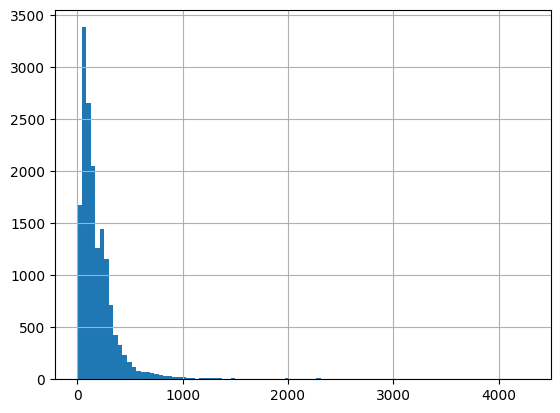

In [144]:
# histogram for num_words_in_answer
raw_dataset['num_words_in_answer'].hist(bins=100)

In [94]:
'\n' in raw_dataset.iloc[15764]['answer']

True